# practice unsupervised learning

##### in this notebook we will practice and explore unsupervised learning techniques
##### in each section we will explore a different technique, and have a practical code example
##### the steps we will follow are:
##### 1. load the data
##### 2. explore and visualized the data
##### 3. preprocess the data
##### 4. evaluate the performance of some clustering algorithms
##### 5. visualize the clusters
##### 6. evaluate the performance of some dimensionality reduction algorithms
##### 7. visualize the data in 2D
##### 8. visualize the data in 3D


##### step 1. import all the required libraries for unsupervised learning and load the data


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score



#### load the data


In [21]:
# create a first function to load the data and give some statistical information, 
# the input of this function is the path of the file and the output is the data frame
def load_and_view_data(path):
    df = pd.read_csv(path)
    print(f'the shape of the data is {df.shape}\n')
    print(f'the columns of the data are \n {df.columns.to_list()}\n')
    # print(f'first 5 rows of the data are {df.head()}\n')
    # print(f'the statistical information of the data is {df.describe()}\n')
    print(f'information about the data is {df.info()}\n')
    print(f'number of missing values {df.isnull().sum()}\n')
    print(f'duplicate values {df.duplicated().sum()}\n')
    print(f'number of unique values {df.nunique()}\n')
    print(f'number of unique values in each column {df.nunique()}\n')
    return df
df = load_and_view_data(r'C:\Users\nirro\Downloads\Credit Card Dataset for Clustering\CC GENERAL.csv')

the shape of the data is (8950, 18)

the columns of the data are 
 ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES        

In [22]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [23]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#### view the data using plots

In [35]:
# create a function to plot the data
def view_raw_data(df):
    for col in df.columns:
        if df[col].dtype == 'object'  and df[col].nunique()<10:
            print(f'column name is {col}')
            sns.countplot(df[col])
            plt.show()
        elif df[col].dtype != 'object':
            print(f'column name is {col}')
            plt.figure(figsize=(2,2))
            sns.displot(df[col])
            plt.show()
            sns.boxplot(df[col])    
            plt.show()
view_raw_data(df)

#### step 2 preprocess the data

In [41]:
# fill the missing values with imputation method
def impute_missing_values(df,n):
        # n_neighborsint, default=5 Number of neighboring samples to use for imputation.
        # weights{‘uniform’, ‘distance’} or callable, default=’uniform’
        # Weight function used in prediction. Possible values:
        # ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
        # ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
        
    imputer = KNNImputer(n_neighbors = n,weights='distance')
    df_filled = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
    return df_filled

# before imputation drop column case_id
df.drop('CUST_ID',axis=1,inplace=True)
df_filled = impute_missing_values(df,n=10)
print(f'number of missing values {df_filled.isnull().sum()}\n')

    

number of missing values BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64



the columns with the missing values is ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

correlation between BALANCE and CREDIT_LIMIT is 0.5312834611329145

we can use regression method to impute the missing values in CREDIT_LIMIT using BALANCE



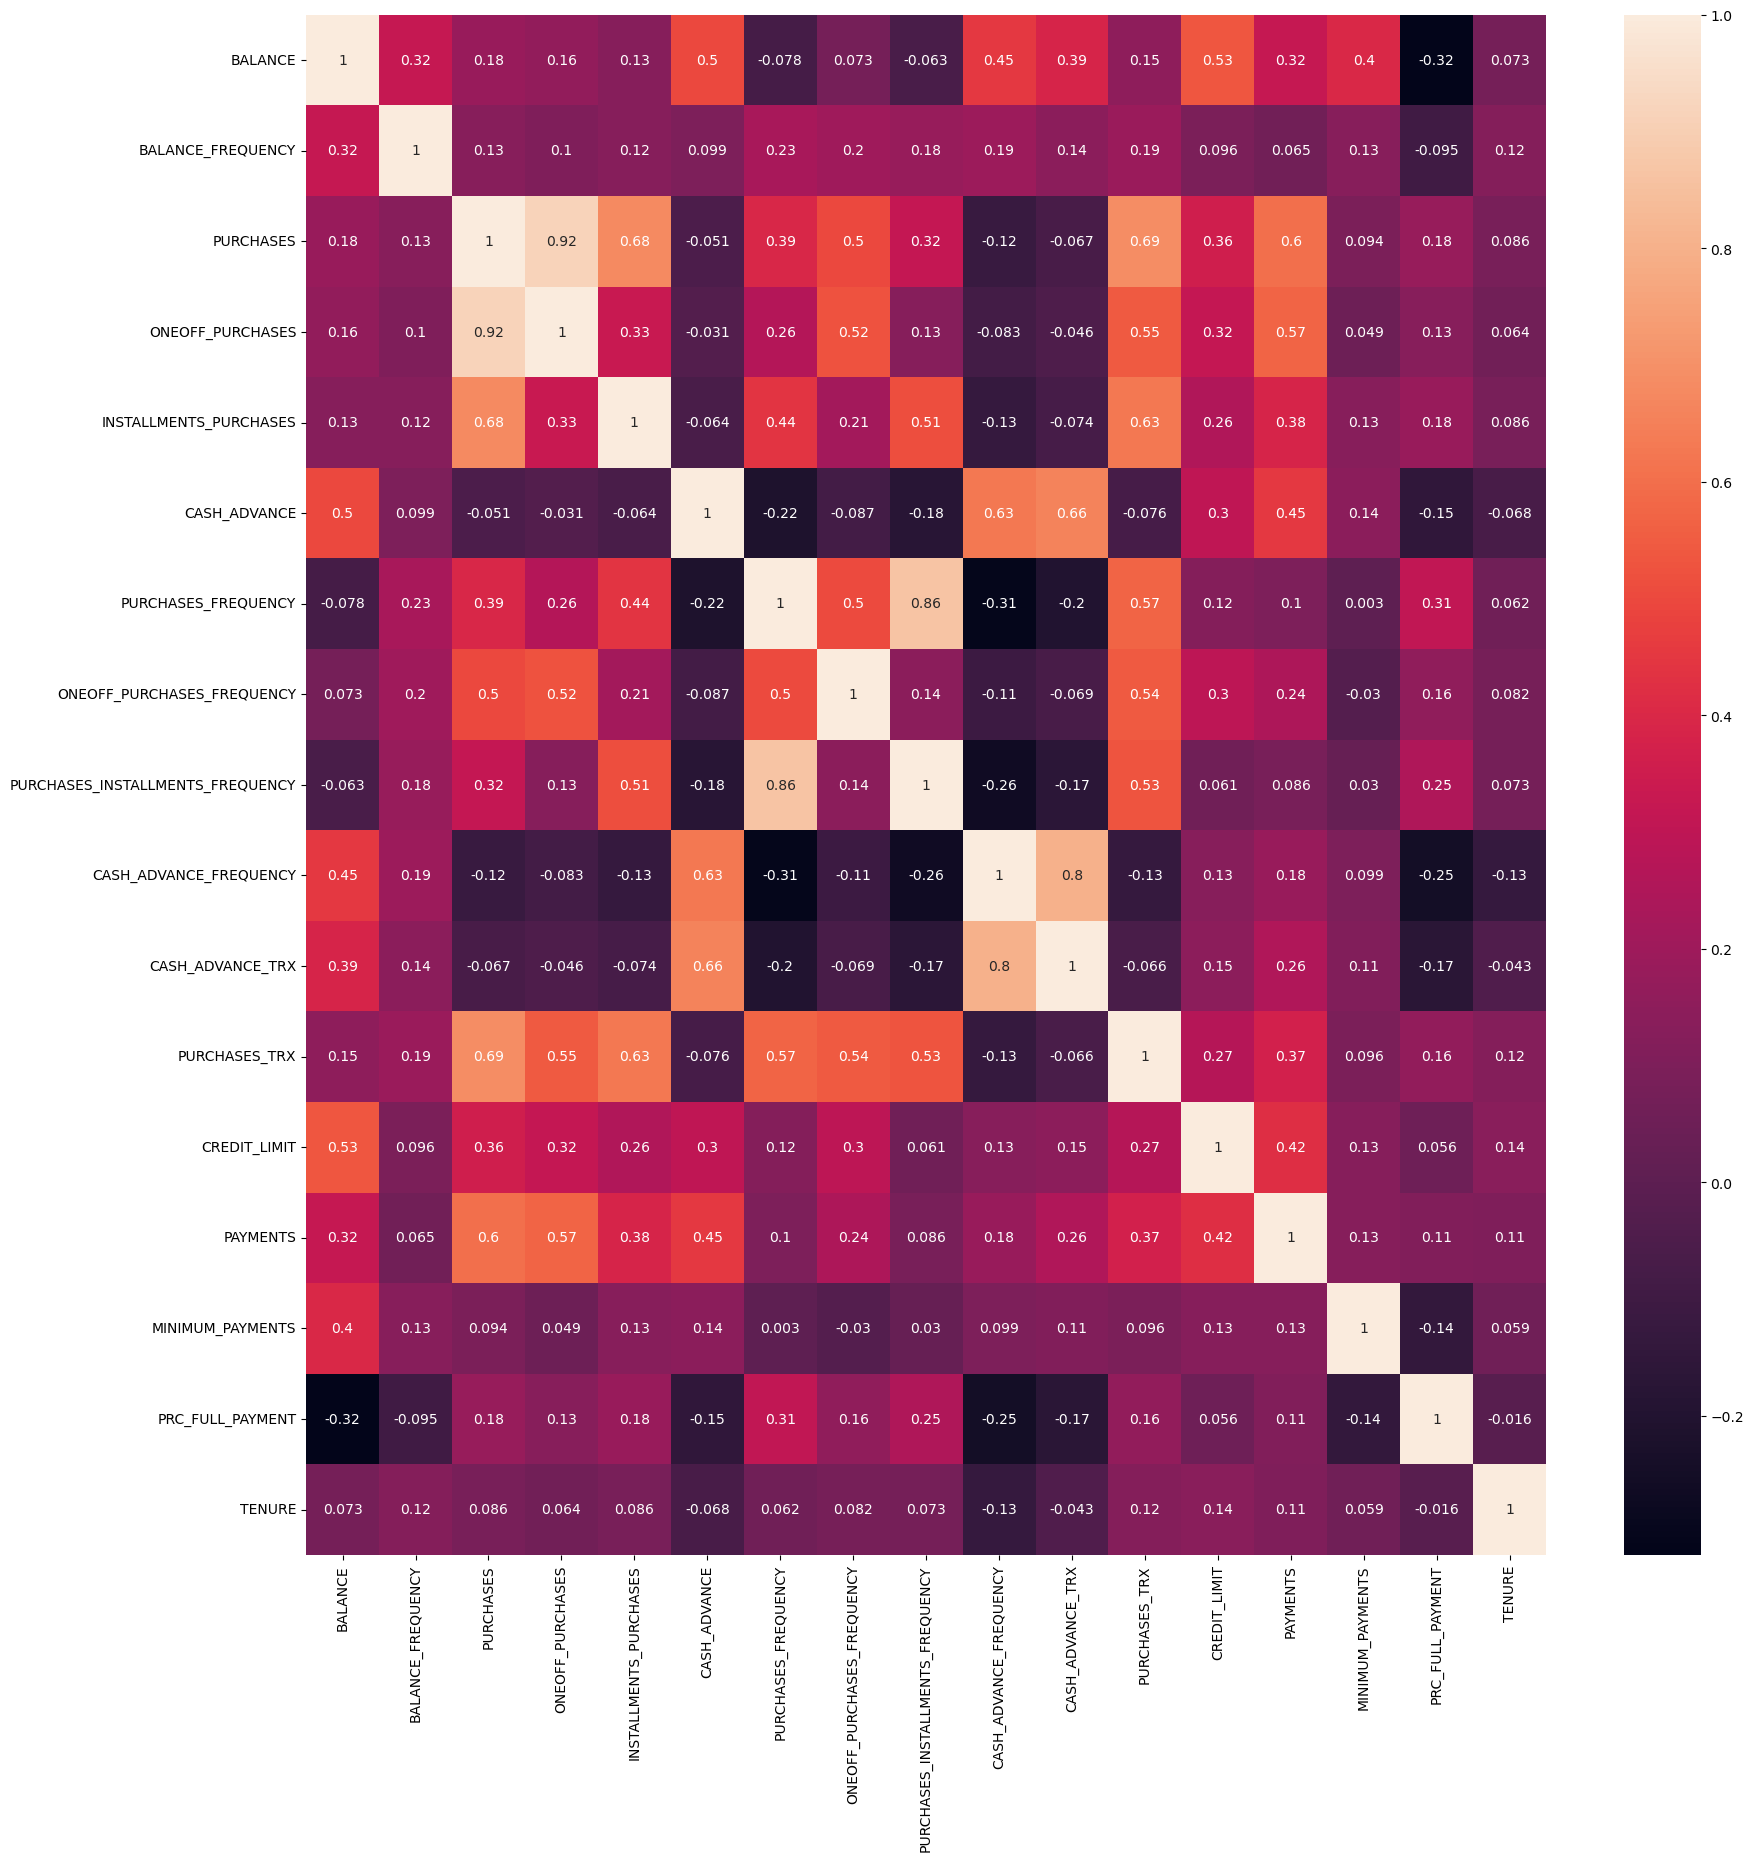

In [51]:
# create another function to impute the missing values with regression method
# before we use this technique we need to check the correlation between the column with the missing values and the other columns
# if the correlation is high then we can use this technique
# if the correlation is low then we can't use this technique
# the input of this function is the data frame and the output is the data frame with the missing values imputed
def check_correlation(df,corr):
    dict_corr = {}
    list_missing_values_columns = df.columns[df.isnull().any()].tolist()
    print(f'the columns with the missing values is {list_missing_values_columns}\n')
    # if there is a high correlation between the column with the missing values and the other columns then we can use regression method to impute the missing values
    
    for column in df.drop(list_missing_values_columns,axis=1).columns:
        for miss in list_missing_values_columns:
            if df[column].dtype != 'object':
                if df[column].corr(df[miss]) > corr:
                    print(f'correlation between {column} and {miss} is {df[column].corr(df[miss])}\n')
                    print(f'we can use regression method to impute the missing values in {miss} using {column}\n')
                    
                    dict_corr[column] = miss          
    corr = df.corr()
    plt.figure(figsize=(20,20))
    sns.heatmap(corr,annot=True)
    plt.show()
    return dict_corr
                    
dict_correlation = check_correlation(df,0.5)

In [57]:
# create a function to impute the missing values with regression method
# the function will resive a dictionery with where the key is the column for the imputation, and the value is the missing data column
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
def imputation_regression(df,dict_imp):
    for key,value in dict_imp.items():
        model = LinearRegression()
        # splite the data into train and test, the train data will be the data without the missing values
        # the test data will be the data with the missing values
        train_df = df[df[value].notnull()]
        X_train,X_test,y_train,y_test = train_test_split(train_df.drop(value,axis=1),train_df[value],test_size=0.4,random_state=0)
        # fit the model with the train data
        model.fit(df[key].values.reshape(-1,1),df[value].values.reshape(-1,1))
        df[value] = model.predict(df[value].values.reshape(-1,1))
    return df
df_regression = imputation_regression(df,dict_correlation)
print(f'number of missing values {df_regression.isnull().sum()}\n')


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').